# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


# Import API key
#import api_keys
api_key = "b0879a8fd831712c26e38acaffe8983a"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-56, 56)
lng_range = (-13, 13)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-55.676098, high=55.676098, size=2000)
lngs = np.random.uniform(low=-12.568337, high=12.568337, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
print(total_cities)

505


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# build data frames
name=[]
lon=[]
lat=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
max_temp=[]
wind_speed=[]
print("Beginning Data Retrieval")
print("-----------------------------")
record=0
#set = 1    
# loop through cities, make API request, and append desired results
for city in cities:
    
    response = requests.get(query_url + city).json()
    #print(json.dumps(response, indent=2, sort_keys=True))
    record = record + 1
    try:
        print(f"Processing Record {record} of {total_cities}  | {city}")
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
#        if city == response['name']:
#            set = set + 1
    except (KeyError, IndexError):
        print(f"City not found. Skipping...... {city}.")
        record = record - 1
        
#print("-----------------------------")       
#print("Beginning Retrieval Complete")
#print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 505  | jamestown
Processing Record 2 of 505  | taoudenni
Processing Record 3 of 505  | djougou
Processing Record 4 of 505  | burgos
Processing Record 5 of 505  | saldanha
Processing Record 6 of 505  | gao
Processing Record 7 of 505  | georgetown
Processing Record 8 of 505  | la baule-escoublac
Processing Record 9 of 505  | teruel
Processing Record 10 of 505  | hermanus
Processing Record 11 of 505  | tiznit
Processing Record 12 of 505  | tralee
Processing Record 13 of 505  | ouidah
Processing Record 14 of 505  | cervo
Processing Record 15 of 505  | ramsgate
Processing Record 16 of 505  | fougeres
Processing Record 17 of 505  | cape town
Processing Record 18 of 505  | omboue
Processing Record 19 of 505  | mayumba
Processing Record 20 of 505  | la roche-sur-yon
Processing Record 21 of 505  | manzil salim
Processing Record 22 of 505  | grand-lahou
Processing Record 23 of 505  | gamba
Processing Record 24 of 505  

Processing Record 178 of 505  | say
Processing Record 179 of 505  | segou
Processing Record 180 of 505  | bembereke
Processing Record 181 of 505  | ruthin
Processing Record 182 of 505  | poiares
Processing Record 183 of 505  | aranda de duero
Processing Record 184 of 505  | faranah
Processing Record 185 of 505  | dedougou
Processing Record 186 of 505  | tabou
Processing Record 187 of 505  | villerupt
Processing Record 188 of 505  | alencon
Processing Record 189 of 505  | wermelskirchen
Processing Record 190 of 505  | bexhill
Processing Record 191 of 505  | aljezur
Processing Record 192 of 505  | montilla
Processing Record 193 of 505  | cape coast
Processing Record 194 of 505  | peterborough
Processing Record 195 of 505  | adiake
Processing Record 196 of 505  | gedinne
Processing Record 197 of 505  | benin
City not found. Skipping...... benin.
Processing Record 197 of 505  | clones
Processing Record 198 of 505  | arklow
Processing Record 199 of 505  | nerja
Processing Record 200 of 505 

Processing Record 351 of 505  | aurillac
Processing Record 352 of 505  | luba
Processing Record 353 of 505  | bana
Processing Record 354 of 505  | el vendrell
Processing Record 355 of 505  | gourcy
Processing Record 356 of 505  | pritzwalk
Processing Record 357 of 505  | bad neustadt
City not found. Skipping...... bad neustadt.
Processing Record 357 of 505  | oirschot
Processing Record 358 of 505  | abakaliki
Processing Record 359 of 505  | palmela
Processing Record 360 of 505  | effium
Processing Record 361 of 505  | zafra
Processing Record 362 of 505  | wilhelmshaven
Processing Record 363 of 505  | kumbo
Processing Record 364 of 505  | tourlaville
Processing Record 365 of 505  | kara
City not found. Skipping...... kara.
Processing Record 365 of 505  | lannion
Processing Record 366 of 505  | imperia
Processing Record 367 of 505  | mbigou
Processing Record 368 of 505  | barbastro
Processing Record 369 of 505  | brenes
Processing Record 370 of 505  | rabat
Processing Record 371 of 505  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#create dataframe for city information

city_dict = {"City": name, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,"Lat": lat,
            "Lon": lon,"Max Temp": max_temp,"Wind Speed": wind_speed}
city_df = pd.DataFrame(city_dict)
city_df.head()

#save to csv file
#city_df.to_csv('output_data/cities.csv')

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Jamestown,0,AU,1537547635,82,-33.21,138.60,40.69,3.06
1,Taoudenni,32,ML,1537547635,14,22.68,-3.98,99.82,5.97
2,Djougou,76,BJ,1537547636,98,9.71,1.67,76.60,4.97
3,Burgos,0,ES,1537545600,22,42.34,-3.70,78.80,3.36
4,Saldanha,20,PT,1537547636,38,41.42,-6.55,74.80,3.74


In [17]:
city_count = city_df.count()
print(city_count)

City          469
Cloudiness    469
Country       469
Date          469
Humidity      469
Lat           469
Lon           469
Max Temp      469
Wind Speed    469
dtype: int64


#### Latitude vs. Temperature Plot

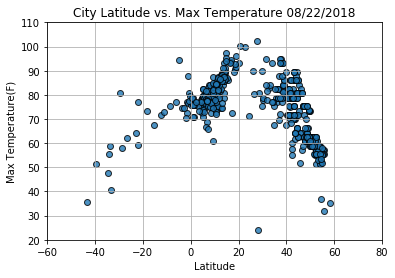

In [20]:
# Incorporate the other graph properties
# Build a scatter plot for each data type

lat= city_df["Lat"]
max_temp = city_df["Max Temp"]

plt.scatter(lat, max_temp, edgecolors="black",marker="o",  linewidths=1,
           alpha=.8,label="Cities")
plt.title("City Latitude vs. Max Temperature 08/22/2018")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.ylim(20,110)
plt.xlim(-60,80)
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
#plt.tight_layout()
plt.show()

#### Latitude vs. Humidity Plot

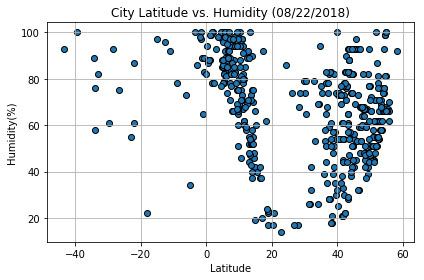

In [24]:
# Calculate Humidity
city_humidity = city_df[('Humidity')]

# Incorporate the other graph properties
# Build a scatter plot for each data type
plt.scatter(lat, city_humidity, marker="o",edgecolors="black")
plt.title("City Latitude vs. Humidity (08/22/2018)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
#plt.ylim(20, 100)
#plt.xlim(-60, 80)
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_humidity.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude vs. Cloudiness Plot

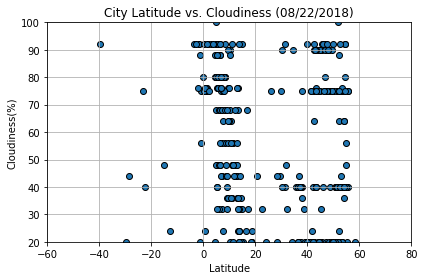

In [25]:
# Calculate cloudiness
city_cloudiness = city_df[('Cloudiness')]

# Incorporate the other graph properties
# Build a scatter plot for each data type
plt.scatter(lat, city_cloudiness, marker="o",edgecolors="black")
plt.title("City Latitude vs. Cloudiness (08/22/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.ylim(20, 100)
plt.xlim(-60, 80)
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

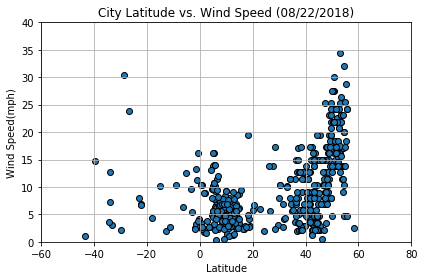

In [26]:
# Calculate Wind Speed
city_wind_speed = city_df[('Wind Speed')]

# Incorporate the other graph properties
# Build a scatter plot for each data type
plt.scatter(lat, city_wind_speed, marker="o",edgecolors="black")
plt.title("City Latitude vs. Wind Speed (08/22/2018)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Wind Speed.png")

# Show plot
plt.tight_layout()
plt.show()